In [94]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import pickle

import sklearn.preprocessing as pp
from mpl_toolkits.mplot3d import Axes3D


#### Pré-Processamento de dados

##### StandardScaler
- Tira a média dos dados e coloca a variância de cada dimensão igual a 1. Cada dimensão dos dados irá variar da mesma maneira que as restantes dimensões. 
- Importante no caso de situações em que algumas dimensões variam bastante em relação a outras dimensões. 
- Necessário primeiro treinar o StandardScaler e depois fazemos a transformação dos dados. 
- Método não supervisionados. 

[0 1 2]

Média de cada dimensão: 
 [5.84333333 3.05733333 3.758      1.19933333]

Desvio padrão de cada uma das dimensões: 
 [0.82530129 0.43441097 1.75940407 0.75969263]


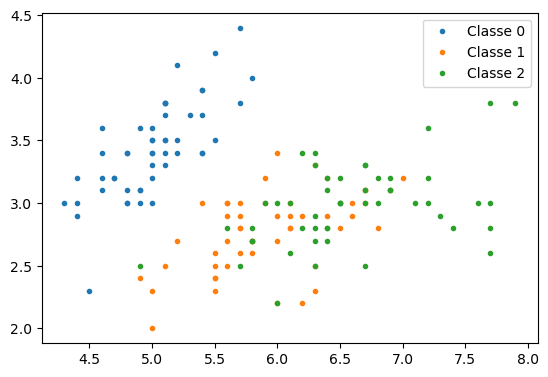

In [50]:
D = dt.load_iris()
X = D['data'].T
y = D['target']
print(np.unique(y))
plt.plot(X[0,y==0], X[1, y==0], '.')
plt.plot(X[0,y==1], X[1, y==1], '.')
plt.plot(X[0,y==2], X[1, y==2], '.')
plt.legend(['Classe 0', 'Classe 1', 'Classe 2'])
plt.axis('scaled')

print("\nMédia de cada dimensão: \n", np.mean(X.T, axis=0))
print("\nDesvio padrão de cada uma das dimensões: \n", np.std(X.T, axis=0) )


Média de cada dimensão: 
 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]

Desvio padrão de cada uma das dimensões: 
 [1. 1. 1. 1.]

NOTA: Média igual a 0 e desvio padrão igual a 1. Centrou os dados em (0,0).


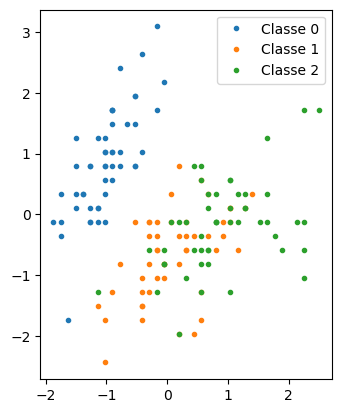

In [51]:
sc = pp.StandardScaler().fit(X.T)
Xs = sc.transform(X.T).T

plt.plot(Xs[0,y==0], Xs[1, y==0], '.')
plt.plot(Xs[0,y==1], Xs[1, y==1], '.')
plt.plot(Xs[0,y==2], Xs[1, y==2], '.')
plt.legend(['Classe 0', 'Classe 1', 'Classe 2'])
plt.axis('scaled')

print("\nMédia de cada dimensão: \n", np.mean(Xs.T, axis=0))
print("\nDesvio padrão de cada uma das dimensões: \n", np.std(Xs.T, axis=0) )

print("\nNOTA: Média igual a 0 e desvio padrão igual a 1. Centrou os dados em (0,0).")

##### RobustScaler
- Tira a mediana dos dados e o orimeiro e último quartil dos dados, em vez da média e da variância. 
- Poe os dados num quadrado ou num cubo, confinados num intervalo de [0, 1].


Média de cada dimensão: 
 [ 0.03333333  0.11466667 -0.16914286 -0.06711111]

Desvio padrão de cada uma das dimensões: 
 [0.63484715 0.86882194 0.50268688 0.50646175]

NOTA: Média igual a 0 e desvio padrão igual a 1. Centrou os dados em (0,0).


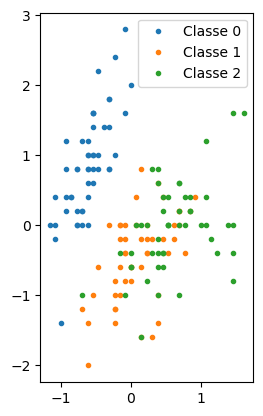

In [65]:
rs = pp.RobustScaler().fit(X.T)
Xn = rs.transform(X.T).T

plt.plot(Xn[0,y==0], Xn[1, y==0], '.')
plt.plot(Xn[0,y==1], Xn[1, y==1], '.')
plt.plot(Xn[0,y==2], Xn[1, y==2], '.')
plt.legend(['Classe 0', 'Classe 1', 'Classe 2'])
plt.axis('scaled')

print("\nMédia de cada dimensão: \n", np.mean(Xn.T, axis=0))
print("\nDesvio padrão de cada uma das dimensões: \n", np.std(Xn.T, axis=0) )

print("\nNOTA: Média igual a 0 e desvio padrão igual a 1. Centrou os dados em (0,0).")

##### MinMaxScaler
- Ver slides para extraír alguma informação. Não está dado nos vídeos. 


Média de cada dimensão: 
 [0.4287037  0.44055556 0.46745763 0.45805556]

Desvio padrão de cada uma das dimensões: 
 [0.22925036 0.18100457 0.29820408 0.31653859]

NOTA: Coloca os dados num quadrado.


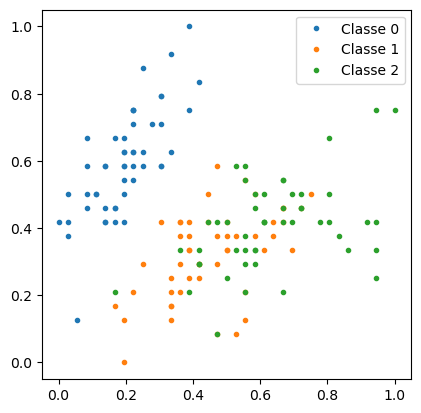

In [66]:
mm = pp.MinMaxScaler().fit(X.T)
Xm = mm.transform(X.T).T

plt.plot(Xm[0,y==0], Xm[1, y==0], '.')
plt.plot(Xm[0,y==1], Xm[1, y==1], '.')
plt.plot(Xm[0,y==2], Xm[1, y==2], '.')
plt.legend(['Classe 0', 'Classe 1', 'Classe 2'])
plt.axis('scaled')

print("\nMédia de cada dimensão: \n", np.mean(Xm.T, axis=0))
print("\nDesvio padrão de cada uma das dimensões: \n", np.std(Xm.T, axis=0) )

print("\nNOTA: Coloca os dados num quadrado.")

##### Normalizer
- Aplicada a dados esparço de alta dimensão ou dados de texto; 
- 1º passo para aplicar a distância com métrica de cosseno. 

- Se antes de aplicar o Normalizer, pré-processar os dados com os seguintes métodos, os resultados são os apresentados abaixo (assumindo apenas 2 dimensões dos dados): 
    * StandardScaler: Dados distribuídos num circulo; 
    * RobustScaler: Dados distribuídos num circulo; 
    * MinMax: Dados distribuídos apenas num quadrante do circulo. 
 - Com 3 dimensões, em vez de um circulo os dados são distribuídos numa esfera. 


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(150,)

Média de cada dimensão: 
 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]

Desvio padrão de cada uma das dimensões: 
 [1. 1. 1. 1.]

NOTA: Coloca os dados num quadrado.


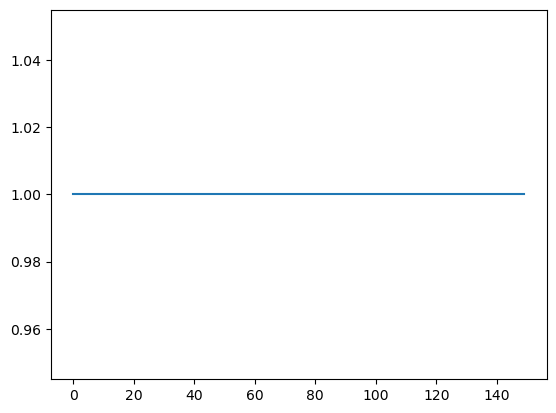

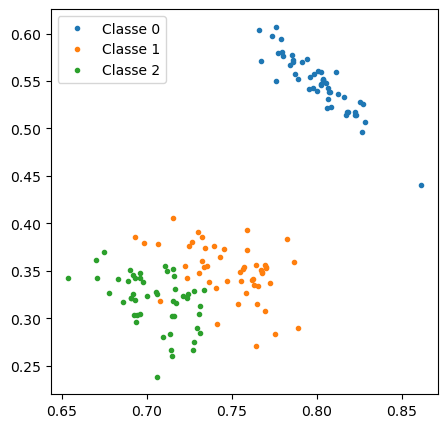

In [72]:
nn = pp.Normalizer().fit(X.T)
Xn = nn.transform(X.T).T
nX = np.sqrt(np.sum(Xn**2, axis=0))
print(nX[:10])
print(nX.shape)
plt.plot(nX)

plt.figure(figsize=(5,5))
plt.plot(Xn[0,y==0], Xn[1, y==0], '.')
plt.plot(Xn[0,y==1], Xn[1, y==1], '.')
plt.plot(Xn[0,y==2], Xn[1, y==2], '.')
plt.legend(['Classe 0', 'Classe 1', 'Classe 2'])

print("\nMédia de cada dimensão: \n", np.mean(Xs.T, axis=0))
print("\nDesvio padrão de cada uma das dimensões: \n", np.std(Xs.T, axis=0) )

print("\nNOTA: Coloca os dados num quadrado.")

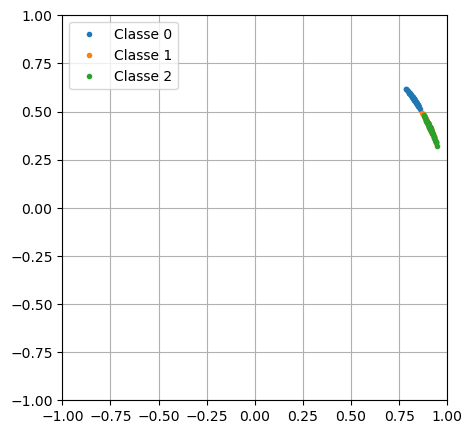

In [82]:
X2 = X[:2, :]

# Se descomentar estas linhas, ou seja, fizer o StardardScaler antes do Normalize, 
# os dados ficam distribuídos num circulo e não apenas numa parte do circulo.  
#sc = pp.StandardScaler().fit(X2.T)
#X2 = sc.transform(X2.T).T


# Se descomentar estas linhas, ou seja, fizer o MinMaxScaler antes do Normalize, 
# os dados ficam distribuídos num quarto do circulo e não apenas numa parte do circulo.  
#mm = pp.MinMaxScaler().fit(X2.T)
#X2 = mm.transform(X2.T).T


nn = pp.Normalizer().fit(X2.T)
Xn = nn.transform(X2.T).T

plt.figure(figsize=(5,5))
plt.plot(Xn[0,y==0], Xn[1, y==0], '.')
plt.plot(Xn[0,y==1], Xn[1, y==1], '.')
plt.plot(Xn[0,y==2], Xn[1, y==2], '.')
plt.legend(['Classe 0', 'Classe 1', 'Classe 2'])
plt.axis('scaled')
plt.axis([-1, 1, -1, 1])
plt.grid(True)



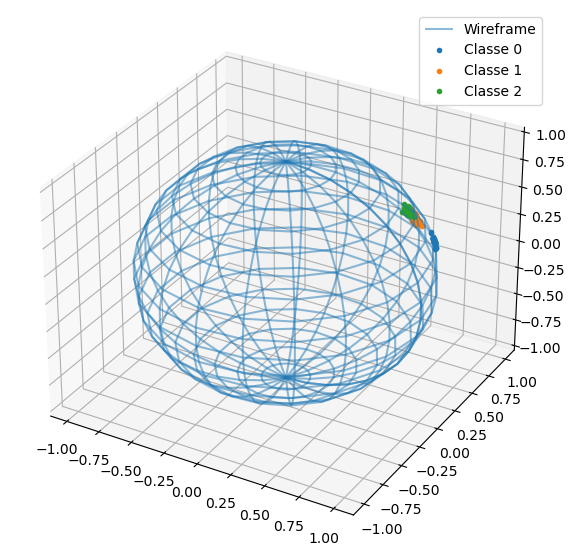

In [93]:
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
gx = np.cos(u)*np.sin(v)
gy = np.sin(u)*np.sin(v)
gz = np.cos(v)
f1 = plt.figure(figsize=(7,7))
ax = f1.add_subplot(111, projection='3d')
ax.plot_wireframe(gx, gy, gz, alpha=.5,)




X2 = X[:3, :]

# Se descomentar estas linhas, ou seja, fizer o StardardScaler antes do Normalize, 
# os dados ficam distribuídos uniformemente na esfera.   
# sc = pp.StandardScaler().fit(X2.T)
# X2 = sc.transform(X2.T).T

# Se descomentar estas linhas, ou seja, fizer o MinMaxScaler antes do Normalize, 
# os dados ficam distribuídos num quarto do circulo e não apenas numa parte do circulo.  
# mm = pp.MinMaxScaler().fit(X2.T)
# X2 = mm.transform(X2.T).T

# Sem a normalização dos dados, os mesmos estão numa zona muito restrita da esfera. 
# Se fizer os pré-processamento com os mecanismos acima as coisas já são diferentes.
# O normalizer funciona melhor se aplicarmos melhor o StandardScaler ou o RobustScaler
# porque a projeção de dados com média diferente de zero é melhor dispersa do que 
# dados com centrados com média zero. 
# Se uma das classes já tiver média zero, este método não funciona porque iria distribuir
# esses dados ao longo do(a) circulo/esfera, havendo sobreposição de classes
# e não sendo possível a distinção das classes. 
nn = pp.Normalizer().fit(X2.T)
Xn = nn.transform(X2.T).T

ax.plot(Xn[0,y==0], Xn[1, y==0], Xn[2, y==0], '.')
ax.plot(Xn[0,y==1], Xn[1, y==1], Xn[2, y==1], '.')
ax.plot(Xn[0,y==2], Xn[1, y==2], Xn[2, y==2], '.')
ax.legend(['Wireframe','Classe 0', 'Classe 1', 'Classe 2'])


#### Com digitos manuscritos

In [95]:
fN ='/Users/anaso/Documents/AA/AA-22-23/Laboratorios/Lab3/Material fornecido/'
D = pickle.load(open(fN, 'rb'))



FileNotFoundError: [Errno 2] No such file or directory: '/Users/anaso/Documents/AA/AA-22-23/Laboratorios/Lab3/Material fornecido/'